In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("data/BTC_2023.csv")

# Hapus kolom non-numerik (waktu dan klasifikasi teks)
numeric_df = df.drop(columns=['Date', 'Change Classification', 'Value_Classification'])

# Pastikan seluruh kolom bersifat numerik
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Buang baris dengan nilai kosong
numeric_df = numeric_df.dropna()

# Hitung korelasi antar kolom
correlation_matrix = numeric_df.corr()

# Loop eksplisit: untuk setiap atribut, tampilkan korelasi terhadap semua atribut lainnya
for base_attr in correlation_matrix.columns:
    print(f"\nKorelasi {base_attr} dengan atribut lainnya:")
    for compare_attr in correlation_matrix.columns:
        if base_attr != compare_attr:
            value = correlation_matrix.loc[base_attr, compare_attr]
            print(f"- {base_attr} vs {compare_attr}: {value:.4f}")



Korelasi Close dengan atribut lainnya:
- Close vs Open: 0.9759
- Close vs High: 0.9935
- Close vs Low: 0.9871
- Close vs Change: 0.0566
- Close vs Value: 0.8853
- Close vs BTC_Closing: 0.9999
- Close vs BTC_Volume: 0.3762

Korelasi Open dengan atribut lainnya:
- Open vs Close: 0.9759
- Open vs High: 0.9848
- Open vs Low: 0.9935
- Open vs Change: -0.1614
- Open vs Value: 0.9155
- Open vs BTC_Closing: 0.9756
- Open vs BTC_Volume: 0.3199

Korelasi High dengan atribut lainnya:
- High vs Close: 0.9935
- High vs Open: 0.9848
- High vs Low: 0.9868
- High vs Change: -0.0115
- High vs Value: 0.8971
- High vs BTC_Closing: 0.9936
- High vs BTC_Volume: 0.4153

Korelasi Low dengan atribut lainnya:
- Low vs Close: 0.9871
- Low vs Open: 0.9935
- Low vs High: 0.9868
- Low vs Change: -0.0843
- Low vs Value: 0.9112
- Low vs BTC_Closing: 0.9868
- Low vs BTC_Volume: 0.3050

Korelasi Change dengan atribut lainnya:
- Change vs Close: 0.0566
- Change vs Open: -0.1614
- Change vs High: -0.0115
- Change vs Lo

Data training: 72 samples
Data testing: 18 samples

Hasil Evaluasi Model:
R² Score: 0.6921
Mean Squared Error: 38.7734
Koefisien (slope): 0.003267
Intercept: -24.383014


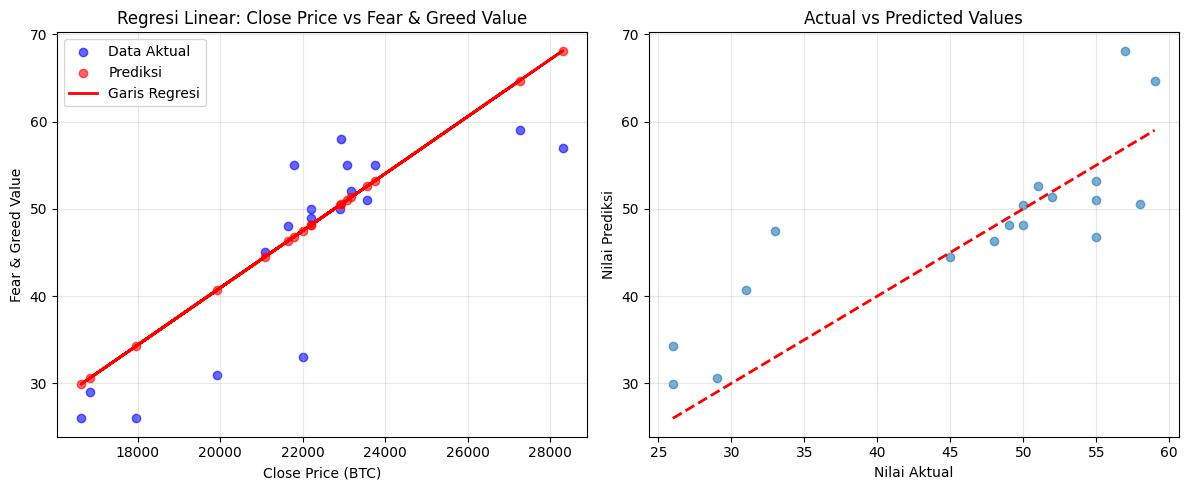

In [3]:
# Regresi linier sederhana antara Close BTC dan Value
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Pisahkan antara X untuk model dan X untuk prediksi
X = numeric_df[['Close']]
y = numeric_df['Value']

# Split data menjadi training dan testing set (80% untuk training, 20% untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data training: {len(X_train)} samples")
print(f"Data testing: {len(X_test)} samples")

# Inisialisasi model regresi linier
model = LinearRegression()

# Fit model dengan data training
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nHasil Evaluasi Model:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Koefisien (slope): {model.coef_[0]:.6f}")
print(f"Intercept: {model.intercept_:.6f}")

# Visualisasi hasil
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot dengan garis regresi
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, alpha=0.6, label='Data Aktual', color='blue')
plt.scatter(X_test, y_pred, alpha=0.6, label='Prediksi', color='red')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Close Price (BTC)')
plt.ylabel('Fear & Greed Value')
plt.title('Regresi Linear: Close Price vs Fear & Greed Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Actual vs Predicted Values')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()